# Data preparation

A collection of commonly required data preparation and transformation operations for time series analyis.

### Content

* Parsing dates when reading files
* Converting columns from string to datetime
* Generating datetime or period indices
* Extracting date elements from columns and indices
* Slicing series with time indices
* Filling and interpolating gaps
* Aggregating over periods
* Calculating date differences (=time deltas) *- TO BE DONE*
* Generating lagged variables
* Generating date dummies
* Smoothing time series
* Differencing time series
* Handling time zones *- TO BE DONE*


### References

* https://docs.python.org/3/library/datetime.html
* https://strftime.org/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.PeriodIndex.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import forecasttk.visualize as viz

plt.style.use("seaborn-whitegrid")

## Parsing dates when reading csv files

* pd.read_csv()

In [2]:
# Load data
df = pd.read_csv("data/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [3]:
# Date is encoded as string
df.dtypes

Date     object
Temp    float64
dtype: object

In [24]:
# Load data: Parse date in column "Date" and infer format automatically 
df = pd.read_csv("data/daily-min-temperatures.csv", 
                 parse_dates=["Date"], 
                 infer_datetime_format=True)
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

In [26]:
# Load data: Parse date in column "Date" and pass specific date format
date_parser = lambda x: dt.datetime.strptime(x, "%Y-%m-%d")
df = pd.read_csv("data/daily-min-temperatures.csv", 
                 parse_dates=["Date"], 
                 infer_datetime_format=True)
df.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

## Converting columns from string to datetime

* pd.to_datetime() 
* dt.datetime.strptime()

In [49]:
# Get a time series
# Date is encoded as string
ts = pd.read_csv("data/daily-min-temperatures.csv")["Date"]
ts.head()

0    1981-01-01
1    1981-01-02
2    1981-01-03
3    1981-01-04
4    1981-01-05
Name: Date, dtype: object

In [50]:
# Convert with pandas to_datetime - infer format automatically
pd.to_datetime(ts).head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: Date, dtype: datetime64[ns]

In [51]:
# Convert with pandas to_datetime - specify format manually
pd.to_datetime(ts, format="%Y-%m-%d").head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: Date, dtype: datetime64[ns]

In [52]:
# Convert with datetime
ts.apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d")).head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: Date, dtype: datetime64[ns]

## Generating datetime or period indices

* Many pandas methods for working with dates and times require the index of a dataframe or series to be a time series

### From string columns

In [62]:
# Load example data
df = pd.read_csv("data/daily-min-temperatures.csv")
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [68]:
# DatetimeIndex
df2 = df.copy()
df2.index = pd.to_datetime(df2["Date"])

df2.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [69]:
# PeriodIndex
df2 = df.copy()
df2.index = pd.to_datetime(df2["Date"])
df2.index = df2.index.to_period("D")

df2.index

PeriodIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
             '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
             '1981-01-09', '1981-01-10',
             ...
             '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
             '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
             '1990-12-30', '1990-12-31'],
            dtype='period[D]', name='Date', length=3650, freq='D')

### From start and end dates

In [5]:
# Generat DatetimeIndex from a start and end date
pd.date_range("2019-11-01", "2019-11-12", freq="D")

DatetimeIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
               '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
               '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# Generat DatetimeIndex from a start date
pd.date_range("2019-11-10", periods=12, freq="D")

DatetimeIndex(['2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13',
               '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21'],
              dtype='datetime64[ns]', freq='D')

In [7]:
# Generat PeriodIndex from a start and end date
pd.period_range("2019-11-01", "2019-11-12", freq="D")

PeriodIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
             '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
             '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12'],
            dtype='period[D]', freq='D')

In [8]:
# Generate PeriodIndex from a start date
pd.period_range("2019-11-01", periods=12, freq="D")

PeriodIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
             '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
             '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12'],
            dtype='period[D]', freq='D')

## Extracting date elements from columns and indices

### From datetime columns

In [70]:
# Get a time series
# Date is encoded as string
ts = pd.read_csv("data/daily-min-temperatures.csv")["Date"]
ts = pd.to_datetime(ts)
ts.head()

0   1981-01-01
1   1981-01-02
2   1981-01-03
3   1981-01-04
4   1981-01-05
Name: Date, dtype: datetime64[ns]

In [71]:
# Extract year
ts.apply(lambda x: x.year).head()

0    1981
1    1981
2    1981
3    1981
4    1981
Name: Date, dtype: int64

In [72]:
# Extract month
ts.apply(lambda x: x.month).head()

0    1
1    1
2    1
3    1
4    1
Name: Date, dtype: int64

In [73]:
# Extract day (=day of month)
ts.apply(lambda x: x.day).head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

In [75]:
# Extract weekday
ts.apply(lambda x: x.weekday()).head()

0    3
1    4
2    5
3    6
4    0
Name: Date, dtype: int64

### From datetime or period indices

In [79]:
# Get a time series
# Date is encoded as string
df = pd.read_csv("data/daily-min-temperatures.csv")
df.index = pd.to_datetime(df["Date"])
ts = df["Temp"]

ts.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [83]:
ts.index.year

Int64Index([1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981, 1981,
            ...
            1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990],
           dtype='int64', name='Date', length=3650)

In [85]:
ts.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=3650)

In [86]:
ts.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=3650)

In [87]:
ts.index.dayofweek

Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=3650)

## Slicing time series using the index

In [9]:
ts = df.copy()
ts.index = pd.to_datetime(ts["Date"])
ts = ts["Temp"]

In [10]:
# get all observations from 1986
ts["1986"].head(10)

Date
1986-01-01    12.9
1986-01-02    13.8
1986-01-03    10.6
1986-01-04    12.6
1986-01-05    13.7
1986-01-06    12.6
1986-01-07    13.1
1986-01-08    15.4
1986-01-09    11.9
1986-01-10    13.8
Name: Temp, dtype: float64

In [11]:
# get all observations from November 1986
ts["1986-11"].head(10)

Date
1986-11-01    10.8
1986-11-02    10.4
1986-11-03     9.1
1986-11-04    16.0
1986-11-05    21.0
1986-11-06    16.2
1986-11-07     8.6
1986-11-08     9.2
1986-11-09    12.5
1986-11-10     9.7
Name: Temp, dtype: float64

In [12]:
# get all observations from January 1st
ts[ts.index.dayofyear == 1].head(10)

Date
1981-01-01    20.7
1982-01-01    17.0
1983-01-01    18.4
1984-01-01    19.5
1985-01-01    13.3
1986-01-01    12.9
1987-01-01    12.3
1988-01-01    15.3
1989-01-01    14.3
1990-01-01    14.8
Name: Temp, dtype: float64

In [13]:
# get all observations from Sunday
ts[ts.index.dayofweek == 6].head(10)

Date
1981-01-04    14.6
1981-01-11    16.2
1981-01-18    24.8
1981-01-25    16.5
1981-02-01    15.3
1981-02-08    17.1
1981-02-15    22.1
1981-02-22    16.5
1981-03-01    17.8
1981-03-08    16.3
Name: Temp, dtype: float64

In [14]:
# get all observations from December
ts[ts.index.month == 12].head(10)

Date
1981-12-01    13.4
1981-12-02    10.5
1981-12-03    14.2
1981-12-04    11.5
1981-12-05    13.0
1981-12-06    15.0
1981-12-07    14.7
1981-12-08    12.6
1981-12-09    12.5
1981-12-10    13.5
Name: Temp, dtype: float64

In [15]:
# get all observations from week of year = 5
ts[ts.index.week == 5].head(10)

Date
1981-01-26    18.7
1981-01-27    19.4
1981-01-28    17.2
1981-01-29    15.5
1981-01-30    15.1
1981-01-31    15.4
1981-02-01    15.3
1982-02-01    14.6
1982-02-02    13.3
1982-02-03    14.8
Name: Temp, dtype: float64

## Filling and interpolating missing values

### Generating gapless indices

In [16]:
# With DatetimeIndex

# Generate series with gaps
ts = pd.Series([30, 40, 70, 90], index=["2019-01-01", "2019-01-04", "2019-01-09", "2019-01-10"])
ts.index = pd.to_datetime(ts.index)

print(ts)

# Generate gapless index
gapless_index = pd.date_range(ts.index[0], ts.index[-1])

# Reindex
ts.reindex(index=gapless_index)

2019-01-01    30
2019-01-04    40
2019-01-09    70
2019-01-10    90
dtype: int64


2019-01-01    30.0
2019-01-02     NaN
2019-01-03     NaN
2019-01-04    40.0
2019-01-05     NaN
2019-01-06     NaN
2019-01-07     NaN
2019-01-08     NaN
2019-01-09    70.0
2019-01-10    90.0
Freq: D, dtype: float64

In [17]:
#### With PeriodIndex

# Generate series with gaps
ts = pd.Series([30, 40, 70, 90], index=["2019-01-01", "2019-01-04", "2019-01-09", "2019-01-10"])
ts.index = pd.to_datetime(ts.index).to_period("D")

print(ts)

# Generate gapless index
gapless_index = pd.period_range(ts.index[0], ts.index[-1])

# Reindex
ts.reindex(index=gapless_index)

2019-01-01    30
2019-01-04    40
2019-01-09    70
2019-01-10    90
Freq: D, dtype: int64


2019-01-01    30.0
2019-01-02     NaN
2019-01-03     NaN
2019-01-04    40.0
2019-01-05     NaN
2019-01-06     NaN
2019-01-07     NaN
2019-01-08     NaN
2019-01-09    70.0
2019-01-10    90.0
Freq: D, dtype: float64

### Filling missing values

In [18]:
# Generate series with gaps
ts = pd.Series([30, 40, 70, 90], index=["2019-01-01", "2019-01-04", "2019-01-09", "2019-01-10"])
ts.index = pd.to_datetime(ts.index)

print(ts)

# Generate gapless index
gapless_index = pd.date_range(ts.index[0], ts.index[-1])

2019-01-01    30
2019-01-04    40
2019-01-09    70
2019-01-10    90
dtype: int64


In [19]:
# Don't fill
ts.reindex(index=gapless_index)

2019-01-01    30.0
2019-01-02     NaN
2019-01-03     NaN
2019-01-04    40.0
2019-01-05     NaN
2019-01-06     NaN
2019-01-07     NaN
2019-01-08     NaN
2019-01-09    70.0
2019-01-10    90.0
Freq: D, dtype: float64

In [20]:
# Fill with 0
ts.reindex(index=gapless_index, fill_value=0)

2019-01-01    30
2019-01-02     0
2019-01-03     0
2019-01-04    40
2019-01-05     0
2019-01-06     0
2019-01-07     0
2019-01-08     0
2019-01-09    70
2019-01-10    90
Freq: D, dtype: int64

In [21]:
# Forward fill: Fill with past values
ts.reindex(index=gapless_index, method="ffill")

2019-01-01    30
2019-01-02    30
2019-01-03    30
2019-01-04    40
2019-01-05    40
2019-01-06    40
2019-01-07    40
2019-01-08    40
2019-01-09    70
2019-01-10    90
Freq: D, dtype: int64

In [22]:
# Backward fill: Fill with future values
ts.reindex(index=gapless_index, method="bfill")

2019-01-01    30
2019-01-02    40
2019-01-03    40
2019-01-04    40
2019-01-05    70
2019-01-06    70
2019-01-07    70
2019-01-08    70
2019-01-09    70
2019-01-10    90
Freq: D, dtype: int64

In [23]:
# Nearest fill: Fill with nearest values
ts.reindex(index=gapless_index, method="nearest")

2019-01-01    30
2019-01-02    30
2019-01-03    40
2019-01-04    40
2019-01-05    40
2019-01-06    40
2019-01-07    70
2019-01-08    70
2019-01-09    70
2019-01-10    90
Freq: D, dtype: int64

### Interpolating missing values

In [24]:
# Generate series with gaps
ts = pd.Series([30, 40, 70, 90], index=["2019-01-01", "2019-01-04", "2019-01-09", "2019-01-10"])
ts.index = pd.to_datetime(ts.index)

# Generate gapless index
gapless_index = pd.date_range(ts.index[0], ts.index[-1])

# Reindex
ts = ts.reindex(index=gapless_index)

print(ts)

2019-01-01    30.0
2019-01-02     NaN
2019-01-03     NaN
2019-01-04    40.0
2019-01-05     NaN
2019-01-06     NaN
2019-01-07     NaN
2019-01-08     NaN
2019-01-09    70.0
2019-01-10    90.0
Freq: D, dtype: float64


In [25]:
# Linear interpolation
ts.interpolate(method="linear")

2019-01-01    30.000000
2019-01-02    33.333333
2019-01-03    36.666667
2019-01-04    40.000000
2019-01-05    46.000000
2019-01-06    52.000000
2019-01-07    58.000000
2019-01-08    64.000000
2019-01-09    70.000000
2019-01-10    90.000000
Freq: D, dtype: float64

In [26]:
# Interpolation with nearest values
ts.interpolate(method="nearest")

2019-01-01    30.0
2019-01-02    30.0
2019-01-03    40.0
2019-01-04    40.0
2019-01-05    40.0
2019-01-06    40.0
2019-01-07    70.0
2019-01-08    70.0
2019-01-09    70.0
2019-01-10    90.0
Freq: D, dtype: float64

In [27]:
# Polynomial interpolation - creates a smooth curve
ts.interpolate(method="polynomial", order=3)

2019-01-01    30.000000
2019-01-02    35.777778
2019-01-03    38.666667
2019-01-04    40.000000
2019-01-05    41.111111
2019-01-06    43.333333
2019-01-07    48.000000
2019-01-08    56.444444
2019-01-09    70.000000
2019-01-10    90.000000
Freq: D, dtype: float64

## Aggregating: Resampling time series

* Frequencies: Y: year, M: month, W: week, D: day, H: hour, ...

In [28]:
# Get time series with PeriodIndex

ts = df.copy()
ts.index = pd.to_datetime(ts["Date"])
ts.index = ts.index.to_period("D")
ts = ts["Temp"]

ts

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temp, Length: 3650, dtype: float64

In [29]:
# Resample to date (doesn't change anything here) - mean values
ts.resample("D").mean()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temp, Length: 3652, dtype: float64

In [30]:
# Resample to week - mean values
ts.resample("W").mean()

Date
1980-12-29/1981-01-04    18.000000
1981-01-05/1981-01-11    17.542857
1981-01-12/1981-01-18    20.371429
1981-01-19/1981-01-25    15.771429
1981-01-26/1981-02-01    16.657143
                           ...    
1990-12-03/1990-12-09    17.600000
1990-12-10/1990-12-16    12.428571
1990-12-17/1990-12-23    14.485714
1990-12-24/1990-12-30    13.471429
1990-12-31/1991-01-06    13.000000
Freq: W-SUN, Name: Temp, Length: 523, dtype: float64

In [31]:
# Resample to month - mean values
ts.resample("M").mean()

Date
1981-01    17.712903
1981-02    17.678571
1981-03    13.500000
1981-04    12.356667
1981-05     9.490323
             ...    
1990-08     7.825806
1990-09     9.166667
1990-10    11.345161
1990-11    12.656667
1990-12    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

In [32]:
# Resample to year - mean values
ts.resample("Y").mean()

Date
1981    11.517260
1982    10.783562
1983    11.187397
1984    10.591781
1985    11.137534
1986    10.803288
1987    10.853151
1988    11.972055
1989    11.261918
1990    11.669589
Freq: A-DEC, Name: Temp, dtype: float64

In [33]:
# Resample  - minimum values
ts.resample("Y").min()

Date
1981    2.1
1982    0.0
1983    0.0
1984    0.1
1985    0.3
1986    0.8
1987    1.5
1988    2.8
1989    0.5
1990    2.1
Freq: A-DEC, Name: Temp, dtype: float64

In [34]:
# Resample - maximum values
ts.resample("Y").max()

Date
1981    25.0
1982    26.3
1983    22.5
1984    24.3
1985    22.4
1986    21.4
1987    24.1
1988    23.9
1989    22.0
1990    22.1
Freq: A-DEC, Name: Temp, dtype: float64

In [35]:
# Resamle - sum (doesn't make sense for temperatures)
ts.resample("Y").sum()

Date
1981    4203.8
1982    3936.0
1983    4083.4
1984    3866.0
1985    4065.2
1986    3943.2
1987    3961.4
1988    4369.8
1989    4110.6
1990    4259.4
Freq: A-DEC, Name: Temp, dtype: float64

## Calculating date differences (=time deltas)

In [ ]:
# TO BE DONE

## Generating lagged variables

In [36]:
# Get dataframe with PeriodIndex

df2 = df.copy()
df2.index = pd.to_datetime(df2["Date"])
df2.index = df2.index.to_period("D")
df2.head()

,Date,Temp
Date,,
1981-01-01,1981-01-01,20.7
1981-01-02,1981-01-02,17.9
1981-01-03,1981-01-03,18.8
1981-01-04,1981-01-04,14.6
1981-01-05,1981-01-05,15.8


In [37]:
# Generate lags: 1 period and 5 periods
df2["Temp_L1"] = df2["Temp"].shift(1)
df2["Temp_L7"] = df2["Temp"].shift(5)

# Generate leads: 1 period and 5 periods
df2["Temp_F1"] = df2["Temp"].shift(-1)
df2["Temp_F7"] = df2["Temp"].shift(-5)

df2.head(10)

,Date,Temp,Temp_L1,Temp_L7,Temp_F1,Temp_F7
Date,,,,,,
1981-01-01,1981-01-01,20.7,NaN,NaN,17.9,15.8
1981-01-02,1981-01-02,17.9,20.7,NaN,18.8,15.8
1981-01-03,1981-01-03,18.8,17.9,NaN,14.6,17.4
1981-01-04,1981-01-04,14.6,18.8,NaN,15.8,21.8
1981-01-05,1981-01-05,15.8,14.6,NaN,15.8,20.0
1981-01-06,1981-01-06,15.8,15.8,20.7,15.8,16.2
1981-01-07,1981-01-07,15.8,15.8,17.9,17.4,13.3
1981-01-08,1981-01-08,17.4,15.8,18.8,21.8,16.7
1981-01-09,1981-01-09,21.8,17.4,14.6,20.0,21.5


In [38]:
# Generate leads: 1 period and 5 periods
df2["Temp_F1"] = df2["Temp"].shift(-1)
df2["Temp_F7"] = df2["Temp"].shift(-5)

df2.drop(["Temp_L1", "Temp_L7"], axis=1).tail(10)

,Date,Temp,Temp_F1,Temp_F7
Date,,,,
1990-12-22,1990-12-22,13.2,13.9,14.0
1990-12-23,1990-12-23,13.9,10.0,13.6
1990-12-24,1990-12-24,10.0,12.9,13.5
1990-12-25,1990-12-25,12.9,14.6,15.7
1990-12-26,1990-12-26,14.6,14.0,13.0
1990-12-27,1990-12-27,14.0,13.6,NaN
1990-12-28,1990-12-28,13.6,13.5,NaN
1990-12-29,1990-12-29,13.5,15.7,NaN
1990-12-30,1990-12-30,15.7,13.0,NaN


## Generating dummy variables for dates

In [39]:
# Generate a dataframe with three columns: customer_id, date, birthday

dates = ["2019-01-01", "2019-01-05", "2019-01-07", "2019-01-12"]
ts = pd.Series(dates, index=dates)
ts.index = pd.to_datetime(ts.index).to_period("D")
gapless_index = pd.period_range(ts.index[0], ts.index[-1])
ts = ts.reindex(index=gapless_index).fillna(method="ffill")

df = pd.DataFrame({"customer_id": range(1, 13),
                   "date": ts.index.astype(str), 
                   "birthday": ts})
df

,customer_id,date,birthday
2019-01-01,1,2019-01-01,2019-01-01
2019-01-02,2,2019-01-02,2019-01-01
2019-01-03,3,2019-01-03,2019-01-01
2019-01-04,4,2019-01-04,2019-01-01
2019-01-05,5,2019-01-05,2019-01-05
2019-01-06,6,2019-01-06,2019-01-05
2019-01-07,7,2019-01-07,2019-01-07
2019-01-08,8,2019-01-08,2019-01-07
2019-01-09,9,2019-01-09,2019-01-07
2019-01-10,10,2019-01-10,2019-01-07


In [40]:
# Generate dummy is_birthday

df["is_birthday"] = df["date"] == df["birthday"]

df

,customer_id,date,birthday,is_birthday
2019-01-01,1,2019-01-01,2019-01-01,True
2019-01-02,2,2019-01-02,2019-01-01,False
2019-01-03,3,2019-01-03,2019-01-01,False
2019-01-04,4,2019-01-04,2019-01-01,False
2019-01-05,5,2019-01-05,2019-01-05,True
2019-01-06,6,2019-01-06,2019-01-05,False
2019-01-07,7,2019-01-07,2019-01-07,True
2019-01-08,8,2019-01-08,2019-01-07,False
2019-01-09,9,2019-01-09,2019-01-07,False
2019-01-10,10,2019-01-10,2019-01-07,False


## Smoothing time series with rolling means

In [41]:
# Get time series with PeriodIndex
df = pd.read_csv("data/daily-min-temperatures.csv")

ts = df.copy()
ts.index = pd.to_datetime(ts["Date"])
ts.index = ts.index.to_period("D")
ts = ts["Temp"]

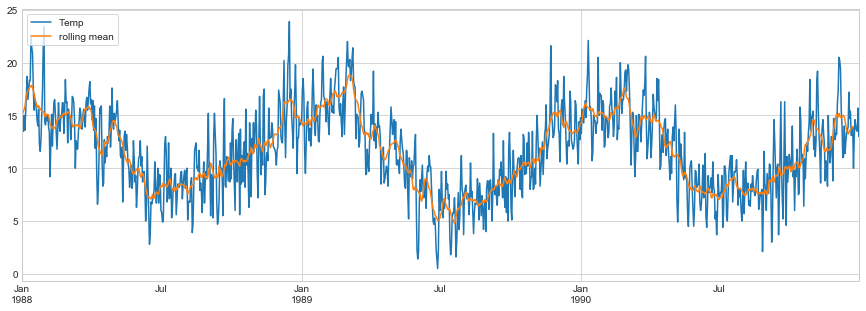

In [47]:
# Rolling mean (window = 15)
rolling_mean = ts.rolling(15, center=True).mean().rename("rolling mean")
viz.plot_series(ts["1988":], rolling_mean["1988":])

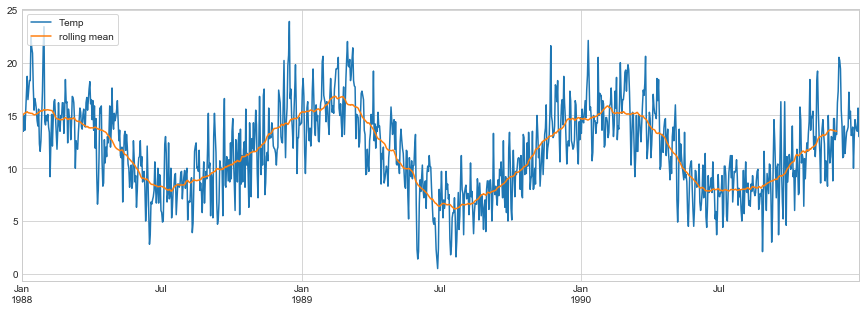

In [46]:
# Rolling mean (window = 60)
rolling_mean = ts.rolling(60, center=True).mean().rename("rolling mean")
viz.plot_series(ts["1988":], rolling_mean["1988":])

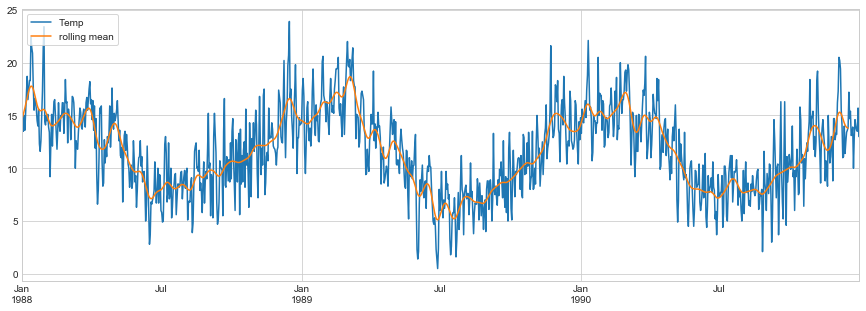

In [48]:
# Gaussian rolling mean (window = 30, standard deviation = 5)
rolling_mean = ts.rolling(30, center=True, win_type="gaussian").mean(std=5).rename("rolling mean")
viz.plot_series(ts["1988":], rolling_mean["1988":])

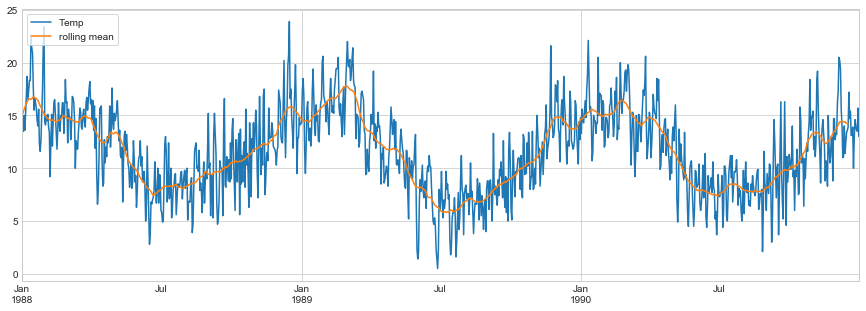

In [49]:
# Gaussian rolling mean (window = 30, standard deviation = 10)
rolling_mean = ts.rolling(30, center=True, win_type="gaussian").mean(std=10).rename("rolling mean")
viz.plot_series(ts["1988":], rolling_mean["1988":])

## Differencing time series

Several time series forecasting algorithms require stationary time series. Computing the first/second/third/... differences of a time series is one way to achieve that.

In [50]:
# Get time series 

ts = df.copy()
ts.index = pd.to_datetime(ts["Date"])
ts.index = ts.index.to_period("D")
ts = ts["Temp"]

ts

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temp, Length: 3650, dtype: float64

In [51]:
# First differences
ts_diff1 = pd.Series(np.diff(ts, n=1), index=ts.index[1:]).reindex(index=ts.index)

ts_diff1

Date
1981-01-01    NaN
1981-01-02   -2.8
1981-01-03    0.9
1981-01-04   -4.2
1981-01-05    1.2
             ... 
1990-12-27   -0.6
1990-12-28   -0.4
1990-12-29   -0.1
1990-12-30    2.2
1990-12-31   -2.7
Freq: D, Length: 3650, dtype: float64

In [52]:
# Second differences
ts_diff1 = pd.Series(np.diff(ts, n=2), index=ts.index[2:]).reindex(index=ts.index)

ts_diff1

Date
1981-01-01    NaN
1981-01-02    NaN
1981-01-03    3.7
1981-01-04   -5.1
1981-01-05    5.4
             ... 
1990-12-27   -2.3
1990-12-28    0.2
1990-12-29    0.3
1990-12-30    2.3
1990-12-31   -4.9
Freq: D, Length: 3650, dtype: float64

## Handling time zones

In [ ]:
# TBD